In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.optimize as opt
from scipy.optimize import fsolve
import numpy as np
from matplotlib import cm

/Users/kunwoosmac/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Q1. 
### Plot and determine the minima

Minima - x = -1.5000000141634802, y =-32.25


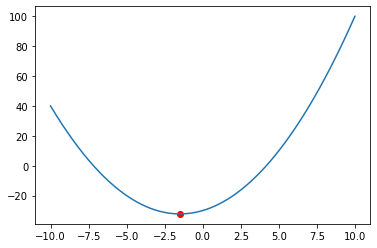

In [2]:
x = np.linspace(-10,10,1000)
y = x**2 + 3*x - 30

plt.plot(x,y)

def Eq(x):
    return x**2 + 3*x - 30

# Use optimize.minimize to find the minima
guess = 0
minima_x = opt.minimize(Eq, guess)['x'][0]
minima_y = Eq(minima_x)

print("Minima - x = {}, y ={}".format(minima_x, minima_y))

# mark the point in the graph
plt.scatter(minima_x, minima_y, color = 'r') 

### Define a function that takes one argument x and return f(x)
- already done it above, but writting it again

In [3]:
def f(x):
    return x**2 + 3*x - 30

### Define a function gradMinimize which takes two arguments: α,x0
- Define a function gradMinimize which takes two arguments: α,x0 where α is the learning rate and x0 is the initial guess. This function returns the minima of f using gradient descent. Inside this function, you need to create a loop which implements the gradient descent algorithm: xi+1 = xi − αf′(xi).
- You can create this loop using the while function in python. The loop should end when either one of the two conditions are satisfied: 
- a. |xi+1 − xi| <tol 
- b. the number of iterations>N.
- Here tol is some small number you choose (such as 10−6) and it indicates that the solution is not changing much with more iterations. Here N is some integer that you choose and it indicates how many maximum iterations the loop should run for - it should not run forever.


In [4]:
def gradMinimize(a, x):
    
    # make a list to plot how the solution converges
    history = []
    # tolerance : 10^-6
    tol = 10**(-6)
    # maximum iteration = 10^5
    b = 10**5
    
    minima = 0
    iter_number = 1
    
    while True:

        temp = x # make variable temp to check if the value have converged
        x = x - a*(2*x + 3)
        if abs(temp - x) < tol or iter_number == b:
            break
        iter_number += 1
        history.append(f(x))
    minima = f(x)
    return minima, history

### Use gradMinimize to find the minima of f(x) and make sure that you get the same answer as that found in the first part of this question. 
- You can try different values of α and x0 and you can even plot how the solution converges by saving f(xi) inside the loop into an evolving vector and then plotting it as a function of iteration number after the problem is solved.

learning rate : 0.001
Value from minimize : -32.25, Value from gradMinimize : -32.249999751815935
learning rate : 0.005
Value from minimize : -32.25, Value from gradMinimize : -32.24999999024527
learning rate : 0.01
Value from minimize : -32.25, Value from gradMinimize : -32.24999999766824
learning rate : 0.05
Value from minimize : -32.25, Value from gradMinimize : -32.24999999993271
learning rate : 0.1
Value from minimize : -32.25, Value from gradMinimize : -32.2499999999871
learning rate : 0.5
Value from minimize : -32.25, Value from gradMinimize : -32.25


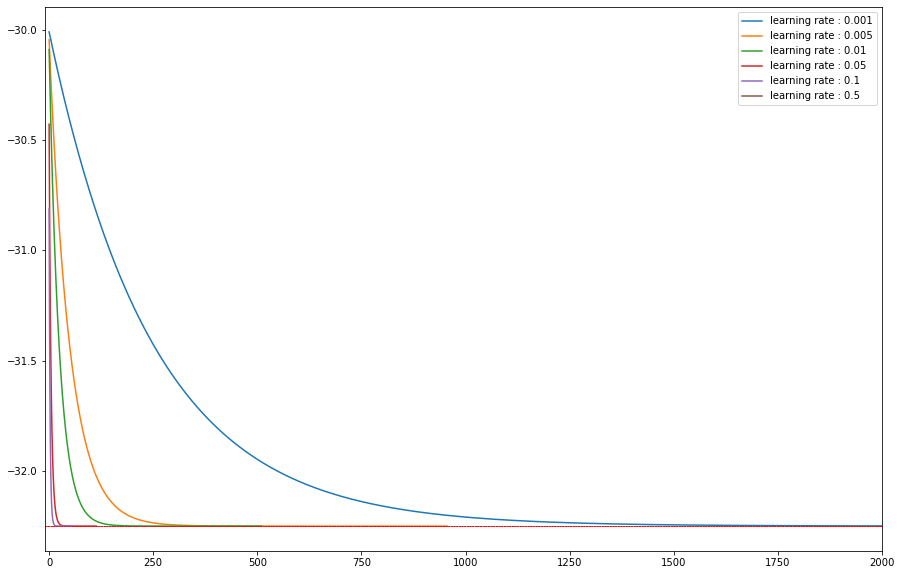

In [5]:
# Check answers with different values of learning rate

alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

plt.figure(figsize = (15,10))

for a in alpha:
    
    minima, history = gradMinimize(a,0)
    print("learning rate :", a)
    print("Value from minimize : {}, Value from gradMinimize : {}".format(minima_y, minima))

    iteration = list(range(len(history)))
    
    plt.plot(iteration, history, label = "learning rate : "+str(a))
    plt.axhline(-32.25, c = 'r', linestyle = '--', linewidth = 0.5)
    plt.xlim(-10, 2000)
    
plt.legend()

- In this case, increasing learning rate makes it converge much faster

x0 : -10
Value from minimize : -32.25, Value from gradMinimize : -32.24999999768141
x0 : -8
Value from minimize : -32.25, Value from gradMinimize : -32.24999999761283
x0 : -6
Value from minimize : -32.25, Value from gradMinimize : -32.249999997632216
x0 : -4
Value from minimize : -32.25, Value from gradMinimize : -32.24999999764123
x0 : -2
Value from minimize : -32.25, Value from gradMinimize : -32.24999999760904
x0 : 0
Value from minimize : -32.25, Value from gradMinimize : -32.24999999766824


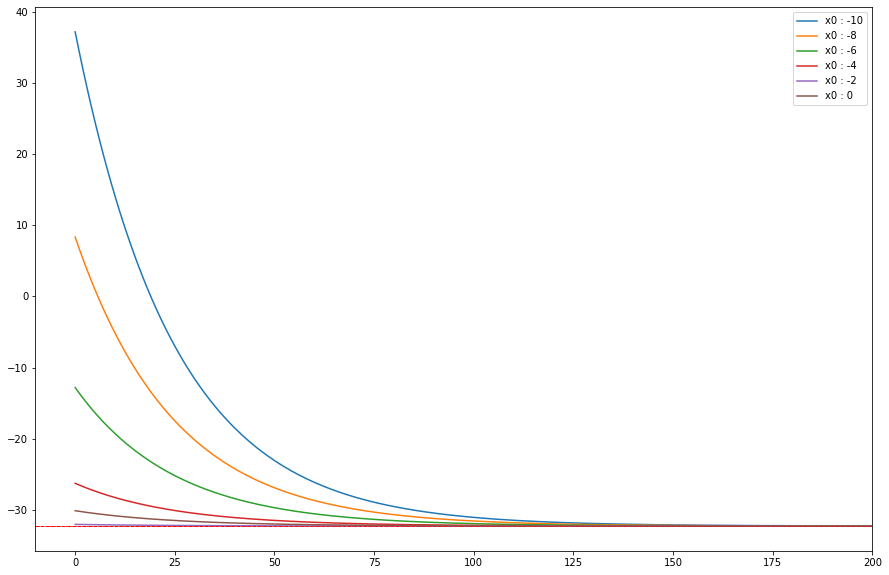

In [6]:
# Check answers with different values of x0

x0_list = [-10, -8, -6, -4, -2, 0]

plt.figure(figsize = (15,10))

for x0 in x0_list:
    
    minima, history = gradMinimize(0.01,x0)
    print("x0 :", x0)
    print("Value from minimize : {}, Value from gradMinimize : {}".format(minima_y, minima))

    iteration = list(range(len(history)))
    
    plt.plot(iteration, history, label = "x0 : "+str(x0))
    plt.axhline(-32.25, c = 'r', linestyle = '-.', linewidth = 0.5)
    plt.xlim(-10, 200)
    
plt.legend()

- In this case, having a x0 closer to zero made it converge much faster

# Q2.
- Use gradMinimize to find all the roots of y = f (x) = x2 − 10x + 12. As discussed in class, you can do this by minimizing [f(x)]2. Verify that the roots are indeed correct.

Caculation from squared function : [1.39445, 5.0, 8.60555]


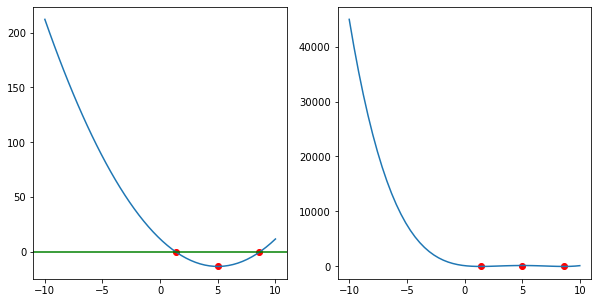

In [7]:
# define a function that returns f(x) and [f(x)]^2
def f_q2(x):
    return x**2 - 10*x + 12, (x**2 - 10*x + 12)**2

def gradMinimize2(a, x):
    tol = 10**(-10)
    b = 10**4
    iter_number = 1
    
    while True:
        temp = x
        x = x - a*(2*(x**2 - 10*x + 12)*(2*x - 10)) 
        if abs(temp - x) < tol or iter_number == b:
            break
        iter_number += 1
    return x

# make a list to get all the roots
roots = []

# setting learning rate to 0.01 as above causes gradient explosion. change it to 0.0001

for x0 in range(-20, 20):
    root = round(gradMinimize2(0.0001, x0), 5)
    if root in roots: # only append the root that is not in list 'roots'
        pass
    else:
        roots.append(root)
        
print("Caculation from squared function :", roots)

plot_x = np.linspace(-10, 10)
plot_y, plot_squared = f_q2(plot_x)

root_y, root_squared = f_q2(np.array(roots))

fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(plot_x, plot_y); ax[0].scatter(roots, root_y, c = 'r'); ax[0].axhline(c = 'green')
ax[1].plot(plot_x, plot_squared); ax[1].scatter(roots, root_squared, c = 'r')

- from the plot, I saw that there was an extra point, which is actually maxima, that was found from gradient descent.
- This is happening because when the guess is 5, gradient becomes 0 and so does error. So the function thinks that the point is minima.
- To avoid this, I added a line to update the x value by 0.0001 even if gradient is 0 to skip the value.

Caculation from squared function : [1.39445, 8.60555]


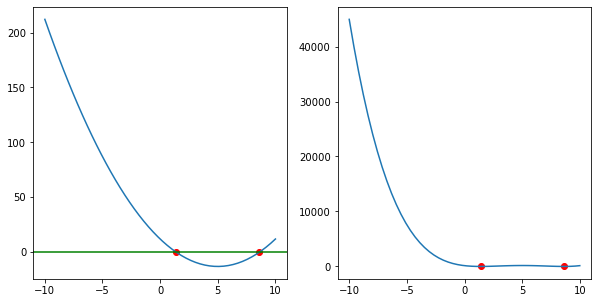

In [8]:
def gradMinimize2(a, x):
    tol = 10**(-10)
    b = 10**4
    iter_number = 1

    while True:  
        temp = x
        x = x - a*(2*(x**2 - 10*x + 12)*(2*x - 10))
        if (2*(x**2 - 10*x + 12)*(2*x - 10)) == 0:
            x += 0.0001
        if abs(temp - x) < tol or iter_number == b:
            break
        iter_number += 1
    return x

roots = []

for x0 in range(-20, 20):
    root = round(gradMinimize2(0.0001, x0), 5)
    if 2*(2*root - 10)**2 + 4*(root**2 - 10*root + 12) > 0: # add only if second derivative is positive
        if root in roots:
            pass
        else:
            roots.append(root)
        
print("Caculation from squared function :", roots)

plot_x = np.linspace(-10, 10)
plot_y, plot_squared = f_q2(plot_x)

root_y, root_squared = f_q2(np.array(roots))

fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(plot_x, plot_y); ax[0].scatter(roots, root_y, c = 'r'); ax[0].axhline(c = 'green')
ax[1].plot(plot_x, plot_squared); ax[1].scatter(roots, root_squared, c = 'r')

# Q3.
- Create a function gradMinimize2var to find the minima of f(x,y) = (x−1)2+y2 using the gradient descent algorithm: (xi+1, yi+1) = (xi, yi)−α∇f(xi, yi). Here, ∇f(xi, yi) = ∇f(x, y)|(xi,yi) is the gradient of the function (∂f/∂x, ∂f/∂y) evaluated at (xi, yi). This function will take inputs α and the initial guess (x0,y0) (you can pass this as a vector in the function). And it will return (xmin,ymin) as the minima of the function.

Iteration Number : 5119
x value : 1.003506517774306, y value : 0.0035419371457632784


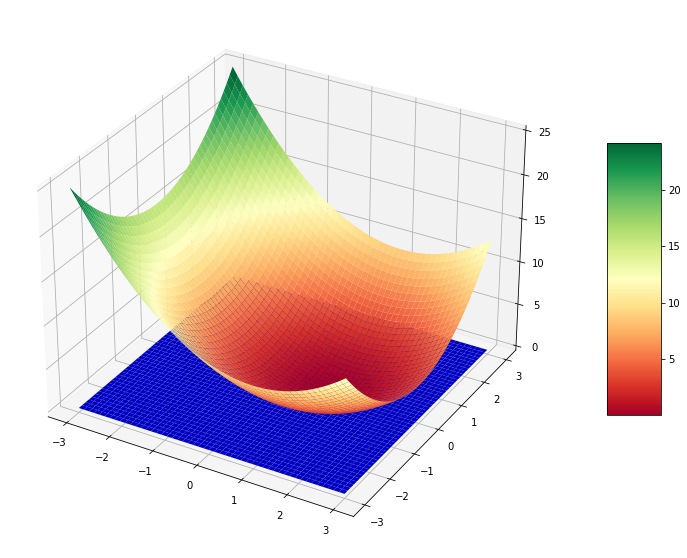

In [9]:
def gradMinimize2var(a, z):
    
    # receive vector z which is initial guess (x,y)
    x = z[0]; y =z[1]
    
    tol = 10**(-10)
    b = 10**4
    
    
    iter_number = 1
    
    while True:
        
        # define the gradient
        gradx = 2*(x-1)
        grady = 2*y
        
        tempx = x; tempy = y
        
        x = x - a*gradx
        y = y - a*grady
        
        # loss : least squared error
        err = (tempx-x)**2 + (tempy-y)**2
        
        if err < tol or iter_number == b:
            break
            
        iter_number += 1

    print("Iteration Number :", iter_number)
    return x, y

guess = np.array([100,100])
# initial guess should not be zero as it will make gradient 0.
# initial guess should not be too big or else 

xmin, ymin = gradMinimize2var(0.001, guess)
print("x value : {}, y value : {}". format(xmin, ymin))

# Check

fig, ax = plt.subplots(subplot_kw = {"projection":'3d'}, figsize = (20,10))

X = np.arange(-3,3,0.001)
Y = np.arange(-3,3,0.001)
X, Y = np.meshgrid(X,Y)

Z = (X-1)**2 + Y**2
Z_minimum = np.zeros((6000,6000))
Z_minimum = Z_minimum + (xmin-1)**2 + ymin**2

surf = ax.plot_surface(X, Y, Z, cmap = cm.RdYlGn)

# Plot a plane at xmin, ymin to see if it is correct
ax.plot_surface(X, Y, Z_minimum,color = 'b')
fig.colorbar(surf, shrink = 0.5, aspect = 5)